## Importing the Necessary Libraries

We start by importing the libraries we are going to use in our example.

- We will import TensorFlow to create our Machine Learning model.
- We will also import the Pandas library to read the CSV file with conversions from kilometers to miles.
- And finally, we will import the Seaborn and Matlotlib libraries to paint the different results.

In [63]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Sample Data

We read a comma-separated values (Kilometres-miles.csv) file into our data frame. This file contains a series of correspondences between kilometers and miles values. We will use this data frame to train our model.

A data frame is a two-dimensional, size-mutable, and heterogeneous tabular data.

In [64]:
df  = pd.read_csv('./kilometres-miles.csv')
df.info

<bound method DataFrame.info of     kilometres    miles
0            1    0.620
1            5    3.100
2           10    6.210
3           15    9.320
4          150   93.200
5          120   74.560
6           30   18.640
7           90   55.920
8           52   32.310
9          800  497.090
10         300  186.411
11         200  124.274
12          25   15.530
13          41   25.470
14           6    3.720
15          62   38.520
16          16    9.940
17           8    4.970
18          34   21.120
19          84   52.190
20          39   24.230
21          74   45.980
22         160   99.410
23         175  108.740
24         230  142.915
25         400  248.540
26         350  217.480
27         510  316.899>

## Painting the Data Frame

We plot the graph of the above values using the “scatterplot” method of the “seaborn” library that we have imported under the name “sns.” It shows us a graphical representation between the X (Kilometers) and Y (miles) correspondences.

Painting the correlations


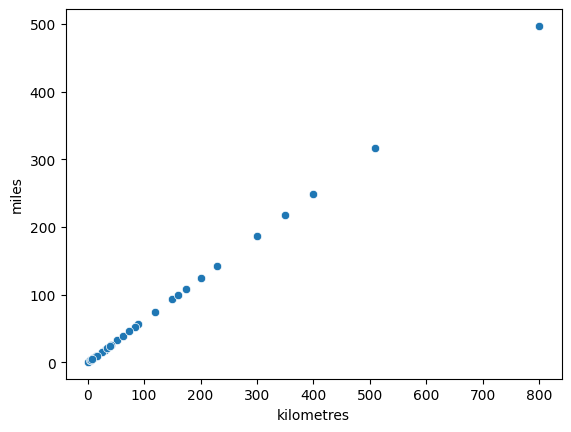

In [65]:
print("Painting the correlations")
# Once we load seaborn into the session, everytime a matplotlib plot is executed, seaborn's default customizations are added
sns.scatterplot(df, x='kilometres', y='miles')
plt.show()

We define the input and the output of the data frame to train the model: X (Kilometers) is the input, and Y (Miles) is the output.

In [66]:
print("Define input(X) and output(Y) variables")
x_train = df['kilometres']
y_train = df['miles']
print(x_train, y_train)

Define input(X) and output(Y) variables
0       1
1       5
2      10
3      15
4     150
5     120
6      30
7      90
8      52
9     800
10    300
11    200
12     25
13     41
14      6
15     62
16     16
17      8
18     34
19     84
20     39
21     74
22    160
23    175
24    230
25    400
26    350
27    510
Name: kilometres, dtype: int64 0       0.620
1       3.100
2       6.210
3       9.320
4      93.200
5      74.560
6      18.640
7      55.920
8      32.310
9     497.090
10    186.411
11    124.274
12     15.530
13     25.470
14      3.720
15     38.520
16      9.940
17      4.970
18     21.120
19     52.190
20     24.230
21     45.980
22     99.410
23    108.740
24    142.915
25    248.540
26    217.480
27    316.899
Name: miles, dtype: float64


## Creating the Neural-Network

Now, let’s use the “keras.Sequential” method to create a neural network to which “layers” are added sequentially. Each layer has the function of gradually distill the input data to obtain the desired output.

In [67]:
print("Creating the model")
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

Creating the model


## Compiling the Model

Before our model is trained, we will add some additional settings during the compilation step.

We will set up an optimizer and a loss function, which will measure our model's accuracy.

- Adam optimization is a stochastic gradient descent method that is based on the adaptive estimation of first-order and second-order moments.
For this, we will use the mean square error-based loss function, which measures our predictions' mean square error.

The objective of our model is to minimize this function.

In [68]:
print("Compiling the model")
model.compile(optimizer=tf.keras.optimizers.Adam(1), loss='mean_squared_error')

Compiling the model


## Training the Model

We are going to use the “fit” method to train our model. First, we pass the independent or input variable (X-Kilometers) and the target variable (Y-Miles).

On the other hand, we indicate the number of epochs. In this case, 250 epochs. An epoch is an iteration over the entire X and Y data provided.

- If the number of epochs is small, the error will be large and vice versa.
- If the number of epochs is big, the execution of the algorithm will be slower.

In [69]:
print ("Training the model")
epochs_hist = model.fit(x_train, y_train, epochs = 250)

Training the model
Epoch 1/250
1/1 [==============================] - 0s 166ms/step - loss: 58520.7109
Epoch 2/250
1/1 [==============================] - 0s 3ms/step - loss: 109.3624
Epoch 3/250
1/1 [==============================] - 0s 1ms/step - loss: 23092.0332
Epoch 4/250
1/1 [==============================] - 0s 2ms/step - loss: 32251.8438
Epoch 5/250
1/1 [==============================] - 0s 1ms/step - loss: 16160.3486
Epoch 6/250
1/1 [==============================] - 0s 3ms/step - loss: 1687.9362
Epoch 7/250
1/1 [==============================] - 0s 2ms/step - loss: 2144.5203
Epoch 8/250
1/1 [==============================] - 0s 3ms/step - loss: 11478.2324
Epoch 9/250
1/1 [==============================] - 0s 2ms/step - loss: 15945.5176
Epoch 10/250
1/1 [==============================] - 0s 4ms/step - loss: 11394.3574
Epoch 11/250
1/1 [==============================] - 0s 2ms/step - loss: 3723.6697
Epoch 12/250
1/1 [==============================] - 0s 2ms/step - loss: 18.3453


## Evaluating the Model

Now we evaluate the created model where we can observe that the loss (Training_loss) decreases as more iterations (epoch) are performed, which is logical if the training set data makes sense and is a large enough group.

Evaluating the model
dict_keys(['loss'])


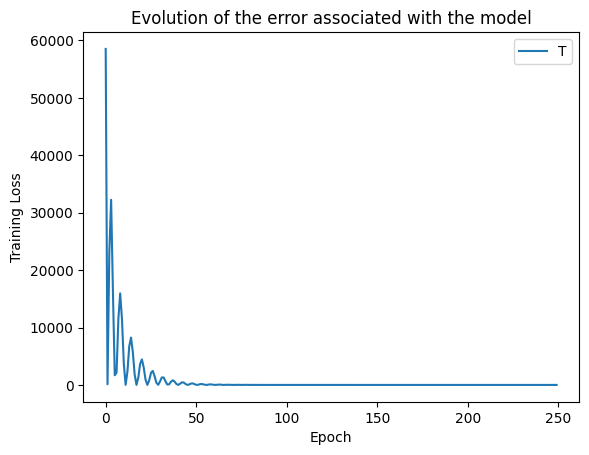

In [70]:
print("Evaluating the model")
print(epochs_hist.history.keys())
	
#graph
plt.plot(epochs_hist.history['loss'])
plt.title('Evolution of the error associated with the model')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend('Training Loss')
plt.show()

We can see from the graph that training the model with 250 steps does not help much and that the error does not decrease after the 50th iteration.

Therefore, the optimal number of steps to train this algorithm would be approximately 50 steps.

## Making the Prediction

Now that we have trained our model, we can use it to make a prediction.

In this case, we assign the value 100 to the model input variable, and the model will return the prediction in miles:

In [71]:
kilometers = 100
predictedMiles = model.predict([kilometers])
print("The conversion from Kilometres to Miles is as follows: " + str(predictedMiles))

1/1 [==============================] - 0s 30ms/step
The conversion from Kilometres to Miles is as follows: [[62.133816]]


## Checking the Result

The conversion from kilometers to miles using the mathematical formula is as follows: 62.13999999999999 Prediction error: 0.00618362

In [72]:
milesByFormula = kilometers * 0.6214
print("The conversion from kilometers to miles using the mathematical formula is as follows:" + str(milesByFormula))
diference = milesByFormula - predictedMiles
print("Prediction error:" + str(diference))

The conversion from kilometers to miles using the mathematical formula is as follows:62.13999999999999
Prediction error:[[0.00618362]]


## Final Thoughts

Through this example, we have seen how to use the TensorFlow library to create a model that has learned to convert kilometers to miles automatically and with a low error.

The mathematics that TensorFlow uses to perform this process is quite simple. Basically, this example uses linear regression to create the model since the input variables: kilometers and the output variables: miles are correlated.

In machine learning, the most time-consuming part of the process is usually preparing the data.

Over time, we gain experience and some intuition that help us choose the most suitable algorithm and its settings, but in general, it is a task to analyze-test and improve.